In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [4]:
salary_data= pd.read_csv('SalaryData_Train(1).csv')
salary_data


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
salary_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


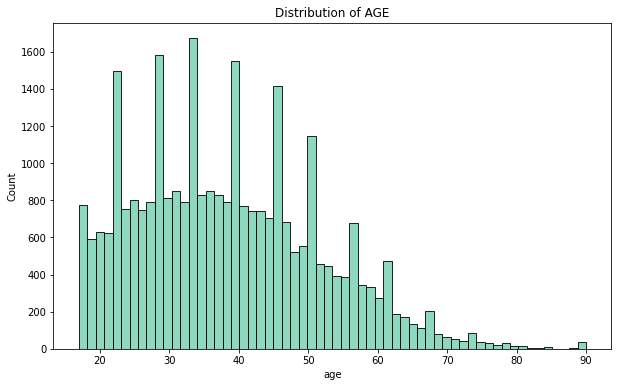

In [7]:
plt.figure(figsize=(10,6))
plt.title("Distribution of AGE")
sns.histplot(salary_data['age'],color='#66CDAA');

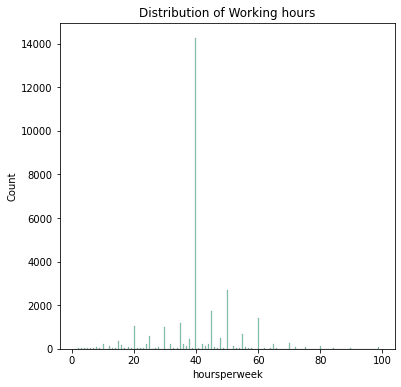

In [8]:
plt.figure(figsize=(6,6))
plt.title("Distribution of Working hours")
sns.histplot(salary_data['hoursperweek'],color='#66CDAA');

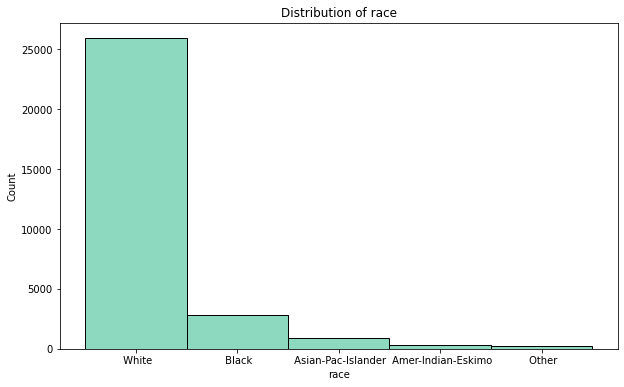

In [9]:
plt.figure(figsize=(10,6))
plt.title("Distribution of race")
sns.histplot(salary_data['race'],color='#66CDAA')


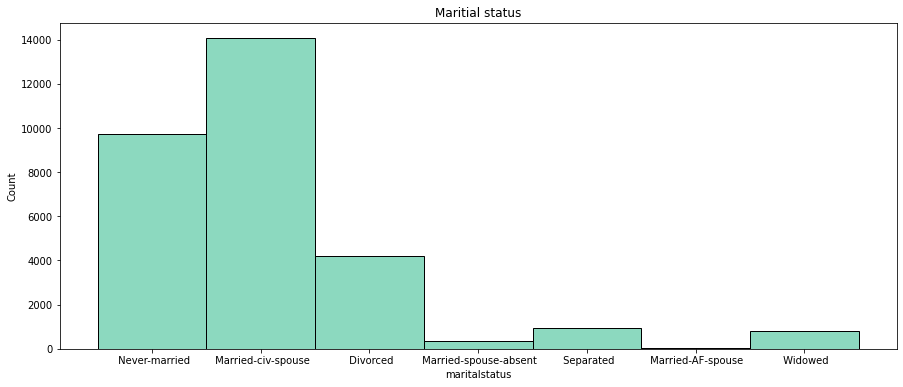

In [10]:
plt.figure(figsize=(15,6))
plt.title("Maritial status")
sns.histplot(salary_data['maritalstatus'],color='#66CDAA');

In [11]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [12]:
le= LabelEncoder()
salary_data['workclass'] = le.fit_transform(salary_data['workclass'])  
salary_data['education'] = le.fit_transform(salary_data['education'])
salary_data['maritalstatus'] = le.fit_transform(salary_data['maritalstatus']) 
salary_data['occupation'] = le.fit_transform(salary_data['occupation']) 
salary_data['relationship'] = le.fit_transform(salary_data['relationship'])
salary_data['race'] = le.fit_transform(salary_data['race'])
salary_data['sex'] = le.fit_transform(salary_data['sex'])
salary_data['native'] = le.fit_transform(salary_data['native'])
salary_data['Salary'] = le.fit_transform(salary_data['Salary'])
salary_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [13]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int64
 2   education      30161 non-null  int64
 3   educationno    30161 non-null  int64
 4   maritalstatus  30161 non-null  int64
 5   occupation     30161 non-null  int64
 6   relationship   30161 non-null  int64
 7   race           30161 non-null  int64
 8   sex            30161 non-null  int64
 9   capitalgain    30161 non-null  int64
 10  capitalloss    30161 non-null  int64
 11  hoursperweek   30161 non-null  int64
 12  native         30161 non-null  int64
 13  Salary         30161 non-null  int64
dtypes: int64(14)
memory usage: 3.2 MB


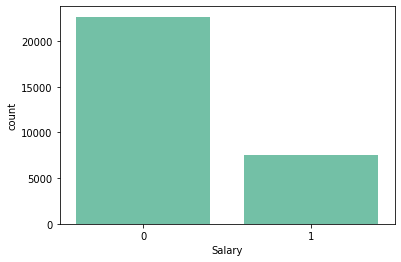

In [14]:
sns.countplot(salary_data['Salary'],color='#66CDAA');

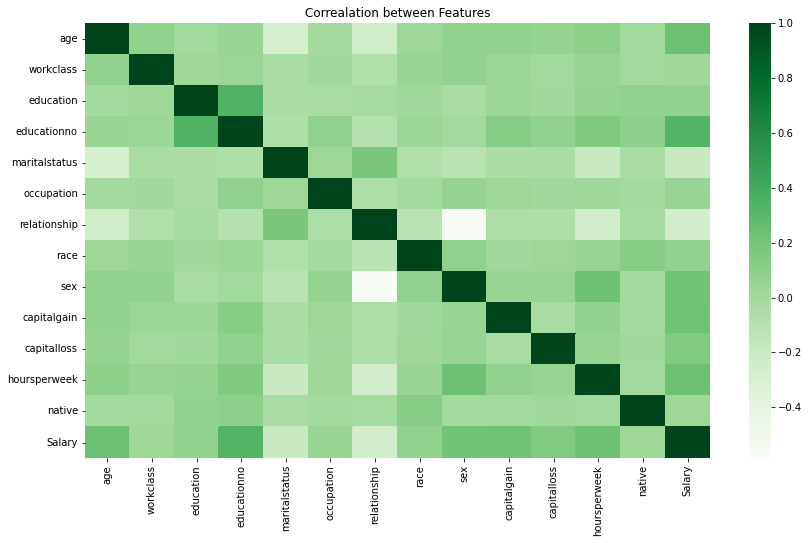

In [15]:
corr=salary_data.corr()
plt.figure(figsize=(14,8))
plt.title("Correalation between Features")
sns.heatmap(corr,cmap='Greens')

In [16]:
X=salary_data.iloc[:,0:13]
Y=salary_data['Salary']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=44)

In [17]:
def get_params(a,b,c):
    clf = SVC(C=a,gamma=b,kernel=c)
    clf.fit(x_train , y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred) * 100
    return acc

In [18]:
get_params(10,5,'rbf')

75.51798441902868

In [19]:
get_params(1,0.5,'rbf')

76.67826951765291

In [20]:
get_params(5,0.8,'rbf')


76.23073097961213

In [21]:
get_params(0.1,5,'rbf')

75.10359688380574

In [22]:
get_params(0.001,0.5,'rbf')

75.10359688380574

In [23]:
get_params(10,0.5,'rbf')

76.26388198242996

In [24]:
classifier = SVC()
classifier.fit(x_train,y_train)

SVC()

In [25]:
pred1=classifier.predict(x_train)

In [26]:
accuracy_on_train= accuracy_score(pred1,y_train)
accuracy_on_train

0.79592175066313

In [27]:
pred=classifier.predict(x_test)

In [28]:
accuracy = accuracy_score(y_test,pred)
accuracy

0.7964528426984916